# 1  DA Mini Project
주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석

개요 :
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.

> 1. 요구사항 분석 및 문제 정의  
2. 배경 확인 및 가설 수립  
3. 데이터 로드 및 확인  
4. 데이터 전처리  
5. 데이터 시각화  
6. 분석 및 결론 도출

## 요구사항 분석 및 문제 정의

* 미션: 구독을 연장한 사용자들의 특징을 파악하라

왜 이런 미션이 주어졌을까? 배경을 파악해보자  
혹시 현재 구독자들 중에 다음달에 구독을 계속한다고 응답한 비율이 적어서 그런걸까?
시각화해서 확인해보자!
* 문제 의식: 구독의 이점을 사용자에게 충분히 전달하고 있을까? 

In [2]:
# 메타 데이터 로드

import pandas as pd
access_data = pd.read_table('data/mini.csv', sep=',')
access_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
access_data.describe(include = 'all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [5]:
set(access_data['subscription_type'])

{'Basic', 'Premium'}

총 만명의 사용자
* 현재 모두 구독 중으로 판단 (구독 유형은 베이직, 프리미엄 두가지로 나뉘는데 결측치 없음)

즉, 온라인 학습 플랫폼 구독자에 대한 데이터셋!

In [6]:
# 필요한 데이터 로드

df0 = access_data[ ['user_id', 'target']]
df0

,user_id,target
0,b919c29d,0
1,a0a60abb,1
2,b9f171ae,1
3,5dc0ba8b,1
4,65c83654,1
...,...,...
9995,ae6b76bc,1
9996,24588752,1
9997,e4622a54,1
9998,e07fbad9,1


In [7]:
# 다음달 구독 여부별 수강생 인원 구하기

target_num = df0.groupby('target')['user_id'].count()
target_num 

target
0    3801
1    6199
Name: user_id, dtype: int64

In [8]:
x = target_num.get(0,0)
x

3801

In [9]:
y = target_num.get(1,0)
y

6199

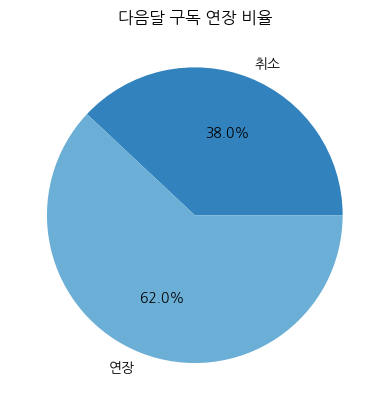

In [10]:
# 파이차트로 시각화

import matplotlib as mpl
import matplotlib.pylab as plt
import koreanize_matplotlib
import numpy as np

ratio = [x/10000, y/10000]
answer = ['취소', '연장']

cmap = plt.get_cmap('tab20c')
colors = cmap(np.arange(len(ratio)) % cmap.N)

plt.pie(ratio, labels=answer, autopct='%.1f%%', colors=colors)
plt.title('다음달 구독 연장 비율')
plt.show()

다음달에 구독을 연장한다고 응답한 비율이 62%인 것으로 보아,  
현재 구독의 이점을 사용자에게 충분히 전달하고 있는 것으로 판단됨

그럼 요구사항이 주어진 이유는 사용자의 구독 연장에 영향을 미치는 요인들을 파악하여 구독 연장 비율을 꾸준히 유지하거나 장기적인 관점에서 증대시키는 목적이겠구나

왜? 구독 서비스 = Saas  
구독 서비스는 계속해서 업그레이드할 수 있다는 장점이 있으며,  
사용자를 수익성이 더 좋은 고급 서비스로 이동시키는 방법을 찾는 것이 핵심 전략

* 문제 정의: 새로운 구독 상품 출시 전, 기존 사용자들의 구독 결정에 영향을 미치는 요소가 파악되지 않아 준비에 난항을 겪고 있음

* 원하는 결과: 구독 결정에 영향을 미치는 요소들을 기반으로 매력적인 구독 상품 기획하기

## 데이터분석 1차

### 배경 및 가설 수립

* 문제 정의: 기존 사용자들의 구독 결정에 영향을 미치는 요소가 파악되지 않아 새로운 구독 상품 준비에 난항을 겪고 있음
* 원하는 결과: 구독을 연장한 사용자의 패턴을 반영하여 매력적인 구독 상품 기획하기
* 1차 목표: 구독 연장 결정에 가장 많이 영향을 미치는 요소 찾기
* 가설 수립
    * 서비스에 가입한 기간이 길수록 다음 달에도 구독할 가능성이 높을 것이다. 
    * 평균 로그인 시간이 길수록 다음 달에도 구독할 가능성이 높을 것이다.
    * 각 학습 세션에 소요된 평균 시간(분)이 길수록 다음 달에도 구독할 가능성이 높을 것이다. 
    * 월간 활동적인 학습 일수가 높을수록 다음 달에도 구독할 가능성이 높을 것이다.
    * 완료한 총 코스 수가 많을수록 다음 달에도 구독할 가능성이 높을 것이다.
    * 최근 학습 성취도가 높을수록 다음 달에도 구독할 가능성이 높을 것이다.
    * 중단된 학습 세션 수가 적을수록 다음 달에도 구독할 가능성이 높을 것이다.
    * 커뮤니티 참여도가 높을수록 다음 달에도 구독할 가능성이 높을 것이다.
    * 선호하는 난이도가 high인 사용자가 다음 달에도 구독할 가능성이 높을 것이다.
    * premium 구독자가 다음 달에도 연장할 가능성이 높을 것이다.
    * 고객 문의 이력이 적을수록 다음 달에도 연장할 가능성이 높을 것이다.
    * 지난 3개월 간의 연장 횟수가 많을수록 다음 달에도 구독할 가능성이 높을 것이다.
* 구독과 직접적인 관계가 있는 변수부터 살펴보자
    * premium 구독자가 다음 달에도 연장할 가능성이 높을 것이다.
    * 지난 3개월 간의 연장 횟수가 많을수록 다음 달에도 구독할 가능성이 높을 것이다.

### 가설 1) 프리미엄 구독자가 구독 연장을 더 많이 할 것이다.

* 프리미엄 멤버쉽을 구매했다는 것은 서비스에 대한 충성도가 높다는 의미
* 필요한 데이터: 각 구독 유형별 구독 연장자 수

In [11]:
# 필요한 데이터 로드

df1 = access_data[ ['user_id', 'subscription_type', 'target'] ]
df1

,user_id,subscription_type,target
0,b919c29d,Basic,0
1,a0a60abb,Basic,1
2,b9f171ae,Premium,1
3,5dc0ba8b,Basic,1
4,65c83654,Basic,1
...,...,...,...
9995,ae6b76bc,Premium,1
9996,24588752,Basic,1
9997,e4622a54,Basic,1
9998,e07fbad9,Basic,1


In [12]:
# 구독 유형별 사용자 수
users_by_subtype = access_data.groupby('subscription_type')['user_id'].count()
users_by_subtype

subscription_type
Basic      5979
Premium    4021
Name: user_id, dtype: int64

In [13]:
# 구독 유형별 구독 연장 여부의 합
targets_by_subtype = access_data.groupby('subscription_type')['target'].sum()
targets_by_subtype

subscription_type
Basic      3683
Premium    2516
Name: target, dtype: int64

In [14]:
# 구독 유형별 구독 연장 비율
renewalrate_by_subtype = targets_by_subtype / users_by_subtype
renewalrate_by_subtype

subscription_type
Basic      0.615989
Premium    0.625715
dtype: float64

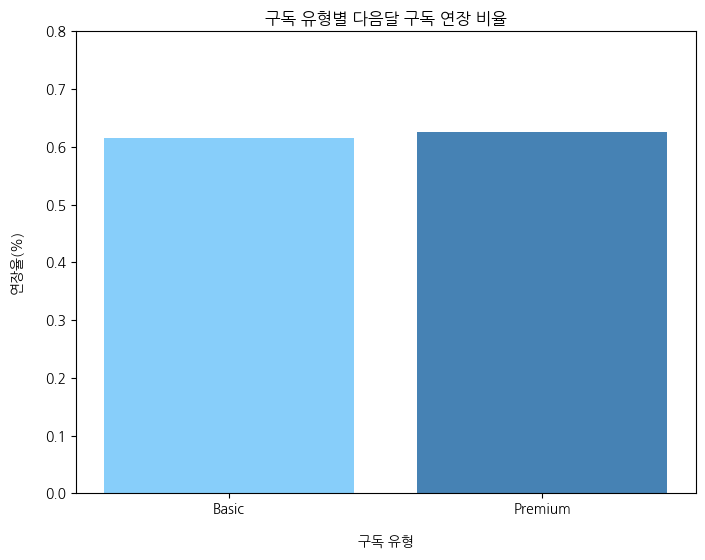

In [15]:
# 시각화
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

plt.figure(figsize=(8,6))
plt.bar(renewalrate_by_subtype.index, renewalrate_by_subtype.values, color=['lightskyblue', 'steelblue'])
plt.title('구독 유형별 다음달 구독 연장 비율')
plt.xlabel('구독 유형',labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)
plt.ylim(0,0.8)

plt.rc('font', size = 13)

plt.show()

유의미한 차이가 없음.(Basic 0.615989 , Premium 0.625715) 약 0.01% 차이  
프리미엄 구독자가 구독 연장을 더 많이 할 것이다 가설 기각  
멤버쉽 유형은 구독 연장 결정에 크게 영향을 미치지 않음  
구독 연장 결정에 영향을 미치는 다른 요소가 있을 것

### 가설2) 이전에 구독을 연장한 횟수가 많을수록 다음달에도 구독을 연장할 것이다.

* 지난 3개월 결제 패턴으로 최근 4개월 간 구독 연장 횟수 파악 가능
> 3회 연장: 7  
2회 연장: 3  
1회 연장: 6, 5, 1  
0회 연장: 0, 2, 4
* 필요한 데이터: 결제 패턴별 구독 연장 횟수, 구독 연장 횟수별 다음달 구독 연장 비율

In [16]:
# 필요한 데이터프레임 생성
df2 = access_data[ ['user_id', 'target'] ]
df3 = access_data[ ['user_id', 'payment_pattern'] ]

In [17]:
# 결제패턴별 연장 횟수 그룹화
# 3회 연장: 7
# 2회 연장: 3
# 1회 연장: 6, 5, 1
# 0회 연장: 0, 2, 4

df3['renewals'] = df3['payment_pattern'].apply(lambda x: '3회 연장' if x == 7 else ('2회 연장' if x == 3 else ('1회 연장' if x in [6, 5, 1] else '0회 연장')))
df3

C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\2491285464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['renewals'] = df3['payment_pattern'].apply(lambda x: '3회 연장' if x == 7 else ('2회 연장' if x == 3 else ('1회 연장' if x in [6, 5, 1] else '0회 연장')))


,user_id,payment_pattern,renewals
0,b919c29d,5,1회 연장
1,a0a60abb,6,1회 연장
2,b9f171ae,7,3회 연장
3,5dc0ba8b,0,0회 연장
4,65c83654,0,0회 연장
...,...,...,...
9995,ae6b76bc,1,1회 연장
9996,24588752,7,3회 연장
9997,e4622a54,6,1회 연장
9998,e07fbad9,0,0회 연장


In [18]:
# 테이블 결합
df4 = pd.merge(df2, df3, on = 'user_id')
df4 

,user_id,target,payment_pattern,renewals
0,b919c29d,0,5,1회 연장
1,a0a60abb,1,6,1회 연장
2,b9f171ae,1,7,3회 연장
3,5dc0ba8b,1,0,0회 연장
4,65c83654,1,0,0회 연장
...,...,...,...,...
9995,ae6b76bc,1,1,1회 연장
9996,24588752,1,7,3회 연장
9997,e4622a54,1,6,1회 연장
9998,e07fbad9,1,0,0회 연장


In [19]:
# 구독 연장횟수별 사용자 수 
users_by_renewals = df4.groupby('renewals')['user_id'].count()
users_by_renewals

renewals
0회 연장    3695
1회 연장    3791
2회 연장    1230
3회 연장    1284
Name: user_id, dtype: int64

In [20]:
# 구독 연장횟수별 다음달에 구독을 연장하는 사용자 수
targets_by_renewals = df4.groupby('renewals')['target'].sum()
targets_by_renewals

renewals
0회 연장    2307
1회 연장    2334
2회 연장     763
3회 연장     795
Name: target, dtype: int64

In [21]:
# 구독 연장횟수별 다음달에 구독을 연장하는 비율
renewalrate_by_renewals = targets_by_renewals / users_by_renewals
renewalrate_by_renewals

renewals
0회 연장    0.624357
1회 연장    0.615669
2회 연장    0.620325
3회 연장    0.619159
dtype: float64

(0.4, 0.8)

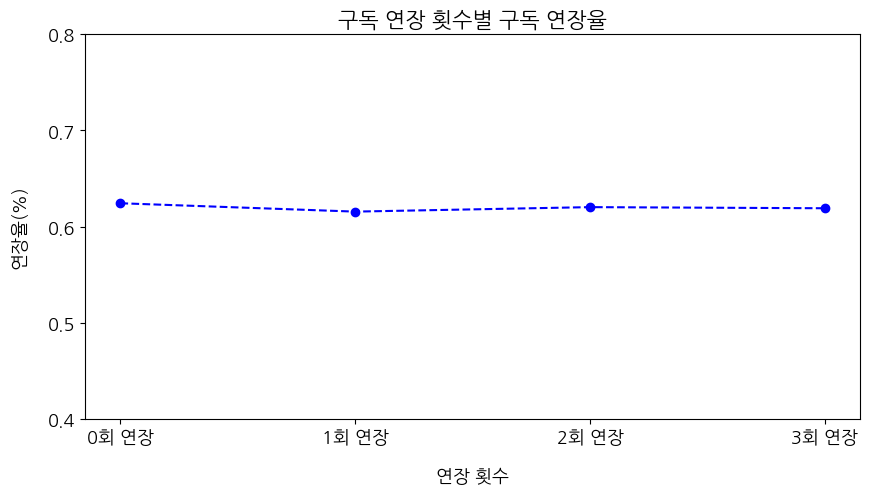

In [125]:
# 시각화

plt.figure(figsize=(10,5))
plt.plot(renewalrate_by_renewals.index, renewalrate_by_renewals.values, 'bo--')

plt.title('구독 연장 횟수별 구독 연장율')
plt.xlabel('연장 횟수', labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)

plt.yticks(np.arange(0.4, 0.9, 0.1))
plt.rc('font', size = 13)

plt.ylim(0.4,0.8)

유의미한 차이 없음  
구독 연장 횟수가 많을수록 구독 연장을 더 많이 할 것이다 가설 기각  
과거 구독 연장 이력은 구독 연장 결정에 크게 영향을 미치지 않음  
구독 연장 결정에 영향을 미치는 다른 요소를 찾자..  

온라인 학습 플랫폼 = 핵심 경험: 학습
* 학습과 관련된 변수들부터 살펴보자

### 가설 3) 한달 동안 꾸준히 학습한 사용자가 구독 연장을 더 많이 할 것이다.

* 필요한 데이터: 월간 활동적인 학습 일수별 구독 연장자 수

In [23]:
# 필요한 데이터프레임 로드
df5 = access_data[ ['user_id', 'monthly_active_learning_days', 'target'] ]
df5

,user_id,monthly_active_learning_days,target
0,b919c29d,18,0
1,a0a60abb,16,1
2,b9f171ae,13,1
3,5dc0ba8b,19,1
4,65c83654,19,1
...,...,...,...
9995,ae6b76bc,18,1
9996,24588752,9,1
9997,e4622a54,24,1
9998,e07fbad9,10,1


In [24]:
# 월별 활동적인 학습 일수 고유값 확인: 1일~24일
set(access_data['monthly_active_learning_days'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [25]:
# 월별 활동적인 학습일수별 사용자 수
users_by_activelearningdays = access_data.groupby('monthly_active_learning_days')['user_id'].count()
users_by_activelearningdays

monthly_active_learning_days
1     395
2     397
3     412
4     446
5     423
6     406
7     422
8     452
9     415
10    435
11    368
12    423
13    398
14    414
15    420
16    389
17    433
18    401
19    428
20    447
21    416
22    405
23    396
24    459
Name: user_id, dtype: int64

In [26]:
# 월간 활동적인 학습일수별 구독 연장자의 합
targets_by_activelearningdays = access_data.groupby('monthly_active_learning_days')['target'].sum()
targets_by_activelearningdays

monthly_active_learning_days
1     263
2     243
3     254
4     269
5     256
6     248
7     260
8     284
9     253
10    265
11    242
12    272
13    237
14    257
15    254
16    229
17    271
18    222
19    268
20    282
21    257
22    258
23    248
24    307
Name: target, dtype: int64

In [27]:
# 월간 활동적인 학습일수별 구독 연장 비율
renewalrate_by_activelearningdays = targets_by_activelearningdays / users_by_activelearningdays
renewalrate_by_activelearningdays

monthly_active_learning_days
1     0.665823
2     0.612091
3     0.616505
4     0.603139
5     0.605201
6     0.610837
7     0.616114
8     0.628319
9     0.609639
10    0.609195
11    0.657609
12    0.643026
13    0.595477
14    0.620773
15    0.604762
16    0.588689
17    0.625866
18    0.553616
19    0.626168
20    0.630872
21    0.617788
22    0.637037
23    0.626263
24    0.668845
dtype: float64

(0.4, 0.8)

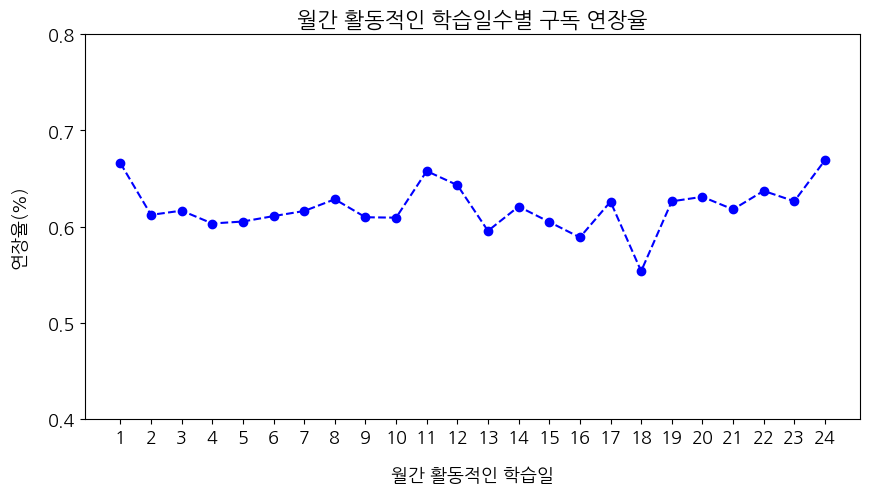

In [28]:
# 시각화

plt.figure(figsize=(10,5))
plt.plot(renewalrate_by_activelearningdays.index, renewalrate_by_activelearningdays.values, 'bo--')

plt.title('월간 활동적인 학습일수별 구독 연장율')
plt.xlabel('월간 활동적인 학습일', labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)

plt.yticks(np.arange(0.4, 0.9, 0.1))
plt.xticks(np.arange(1, 25, 1))
plt.rc('font', size = 13)

plt.ylim(0.4,0.8)

24일 모두 학습한 경우 구독 연장율이 가장 높고, 그 다음으로 1일, 11일 순  
구독 연장율이 월간 활동적인 학습 일수와 완벽히 비례하는 것은 아니지만,  
매일매일 꾸준히 학습하는 사용자가 구독을 연장할 비율이 높음 > 매일 접속해 학습 콘텐츠를 수강하도록 유도한다.  
10일 미만으로 학습한 사용자에게도 적극적으로 구독 연장 푸쉬를 보내 연장을 유도한다.  
2주 이상 수강한 사용자들에게도 지속적으로 동기를 부여할 것 (18 방지)

### 가설 4) 완료한 총 코스 수가 많은 사용자가 구독 연장을 더 많이 할 것이다.

* 필요한 데이터: 완료한 총 코스 수별 구독 연장자 수

In [29]:
# 필요한 데이터 로드
df6 = access_data[ ['user_id', 'total_completed_courses', 'target'] ]
df6

,user_id,total_completed_courses,target
0,b919c29d,16,0
1,a0a60abb,13,1
2,b9f171ae,14,1
3,5dc0ba8b,18,1
4,65c83654,10,1
...,...,...,...
9995,ae6b76bc,16,1
9996,24588752,8,1
9997,e4622a54,14,1
9998,e07fbad9,10,1


In [30]:
# 완료한 총 코스 수 고유값 확인: 1 ~ 27개
set(access_data['total_completed_courses'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27}

In [31]:
# 완료한 총 코스 수별 사용자 수
users_by_completed_cousers = access_data.groupby('total_completed_courses')['user_id'].count()
users_by_completed_cousers

total_completed_courses
1        1
2       10
3       23
4       60
5      155
6      238
7      442
8      599
9      806
10     944
11    1064
12    1105
13    1023
14     936
15     783
16     563
17     471
18     326
19     190
20     115
21      62
22      30
23      27
24      12
25       7
26       5
27       3
Name: user_id, dtype: int64

In [32]:
# 완료한 총 코스수별 구독 연장자의 합
targets_by_completed_cousers = access_data.groupby('total_completed_courses')['target'].sum()
targets_by_completed_cousers

total_completed_courses
1       0
2       7
3      15
4      44
5     106
6     143
7     259
8     368
9     502
10    611
11    645
12    677
13    628
14    584
15    477
16    353
17    298
18    210
19    120
20     70
21     35
22     15
23     16
24      7
25      5
26      3
27      1
Name: target, dtype: int64

In [33]:
# 완료한 총 코스 수별 구독 연장 비율
renewalrate_by_completed_cousers = targets_by_completed_cousers / users_by_completed_cousers
renewalrate_by_completed_cousers

total_completed_courses
1     0.000000
2     0.700000
3     0.652174
4     0.733333
5     0.683871
6     0.600840
7     0.585973
8     0.614357
9     0.622829
10    0.647246
11    0.606203
12    0.612670
13    0.613881
14    0.623932
15    0.609195
16    0.626998
17    0.632696
18    0.644172
19    0.631579
20    0.608696
21    0.564516
22    0.500000
23    0.592593
24    0.583333
25    0.714286
26    0.600000
27    0.333333
dtype: float64

(0.0, 1.0)

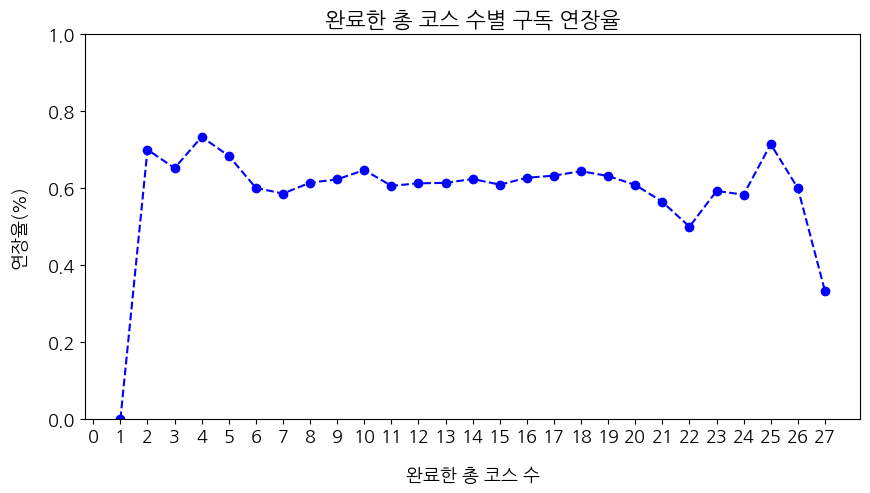

In [34]:
# 시각화

plt.figure(figsize=(10,5))
plt.plot(renewalrate_by_completed_cousers.index, renewalrate_by_completed_cousers.values, 'bo--')

plt.title('완료한 총 코스 수별 구독 연장율')
plt.xlabel('완료한 총 코스 수', labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)

plt.xticks(np.arange(0, 28, 1))
plt.ylim(0,1)
plt.rc('font', size = 13)

plt.ylim(0,1)

25개 이상 코스를 완료한 경우 구독 연장율이 감소한다 > 콘텐츠 개선 필요  
1 > 2개가 될 때 비약적으로 증가하는 경향 : 코스를 2개 이상 완료할 수 있게 유도한다

### 가설 5) 최근 학습 성취도가 높은 사용자일수록 구독 연장을 더 많이 할 것이다.

* 학습 성취도 = 콘텐츠에 대한 반응 
    * 학습 성취도가 높다는 것은 콘텐츠가 사용자의 학습에 지속적으로 도움이 된다는 뜻!
* 필요한 데이터: 최근 학습 성취도별 구독 연장자 수

In [35]:
# 필요한 데이터프레임 생성
df7 = access_data[ ['user_id', 'recent_learning_achievement', 'target'] ]
df7

,user_id,recent_learning_achievement,target
0,b919c29d,68.360455,0
1,a0a60abb,97.567322,1
2,b9f171ae,94.358763,1
3,5dc0ba8b,70.153228,1
4,65c83654,81.917908,1
...,...,...,...
9995,ae6b76bc,64.966803,1
9996,24588752,82.750244,1
9997,e4622a54,81.567839,1
9998,e07fbad9,89.885656,1


In [36]:
# 학습성취도 고유값 확인
set(access_data['recent_learning_achievement'])

{73.65800236190044,
 81.41864963418313,
 80.56700823424947,
 75.86007320402338,
 35.94175494123262,
 36.83097920769522,
 41.752942298027165,
 42.87024809134489,
 43.73391357512165,
 44.72799679511624,
 44.359111698328846,
 45.35772102051634,
 44.98005221511744,
 47.69736103936145,
 48.17376889178469,
 50.08207537409214,
 51.19228548979622,
 52.811292942288304,
 53.998059288166544,
 54.53896550859436,
 55.186515865980425,
 55.59218480264673,
 57.64699179252341,
 57.84855765606491,
 51.1398200135493,
 60.007255768676,
 52.20322709526636,
 62.36469375715866,
 55.49543250606848,
 64.78539031402116,
 65.05389607373827,
 65.76125769454686,
 67.72031343407906,
 64.52177893811395,
 66.13652321832086,
 66.83925954368823,
 71.80733482289797,
 71.30678679096003,
 73.95053316308041,
 67.08407186425592,
 75.46905872627555,
 75.12042699648607,
 77.81611050626913,
 77.97114186523704,
 79.01259259110341,
 80.62108374863284,
 76.27273919806846,
 75.23372847030039,
 83.5448810311368,
 83.56575795525485,

In [37]:
#최대 최소값을 확인하고 그룹화해보자: 35 ~ 112.xx
access_data['recent_learning_achievement'].max()

112.64382751988168

In [38]:
access_data['recent_learning_achievement'].min()

35.94175494123262

In [52]:
# 범주화할 데이터 리스트 생성
achieve_rate = list(df7['recent_learning_achievement'])
achieve_rate[:10]

[68.36045451291152,
 97.56732180488912,
 94.35876337099018,
 70.15322825333023,
 81.91790764651992,
 74.37102805868864,
 58.70838958775084,
 88.56777663662491,
 63.62439481255824,
 57.64699179252341]

In [53]:
# 범주를 구분하는 기준 및 라벨 만들기
bins = [30, 60, 70, 80, 90, 120]
labels=['E', 'D', 'C', 'B', 'A']

# 성취도에 따라 등급별로 변경하기
cuts = pd.cut(achieve_rate, bins, right = True, include_lowest=True, labels=labels)
cuts

['D', 'A', 'A', 'C', 'B', ..., 'D', 'B', 'B', 'B', 'D']
Length: 10000
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [54]:
# 범주화 결과물을 테이블로 변경
cuts = pd.DataFrame(cuts)
cuts.tail()

,0
9995,D
9996,B
9997,B
9998,B
9999,D


In [60]:
# 기존 테이블에 합치기
df7 = pd.concat( [df7, cuts], axis = 1, join='inner')
df7.head()

,user_id,recent_learning_achievement,target,0
0,b919c29d,68.360455,0,D
1,a0a60abb,97.567322,1,A
2,b9f171ae,94.358763,1,A
3,5dc0ba8b,70.153228,1,C
4,65c83654,81.917908,1,B


In [61]:
# 컬럼명 변경
df7.columns = ['user_id','recent_learning_achievement', 'target', 'achieve_level']
df7

,user_id,recent_learning_achievement,target,achieve_level
0,b919c29d,68.360455,0,D
1,a0a60abb,97.567322,1,A
2,b9f171ae,94.358763,1,A
3,5dc0ba8b,70.153228,1,C
4,65c83654,81.917908,1,B
...,...,...,...,...
9995,ae6b76bc,64.966803,1,D
9996,24588752,82.750244,1,B
9997,e4622a54,81.567839,1,B
9998,e07fbad9,89.885656,1,B


In [63]:
# 최근 학습 성취도별 사용자 수
users_by_achieve_level = df7.groupby('achieve_level')['user_id'].count()
users_by_achieve_level

achieve_level
E     675
D    2396
C    3823
B    2456
A     650
Name: user_id, dtype: int64

In [64]:
# 최근 학습 성취도별 구독 연장자 수
targets_by_achieve_level = df7.groupby('achieve_level')['target'].sum()
targets_by_achieve_level

achieve_level
E     422
D    1477
C    2364
B    1528
A     408
Name: target, dtype: int64

In [65]:
#  최근 학습 성취도별 구독 연장 비율
renewalrate_by_achieve_level = targets_by_achieve_level / users_by_achieve_level
renewalrate_by_achieve_level

achieve_level
E    0.625185
D    0.616444
C    0.618363
B    0.622150
A    0.627692
dtype: float64

In [68]:
# 데이터 정렬
renewalrate_by_achieve_level = renewalrate_by_achieve_level.reindex(['A', 'B', 'C', 'D', 'E'])

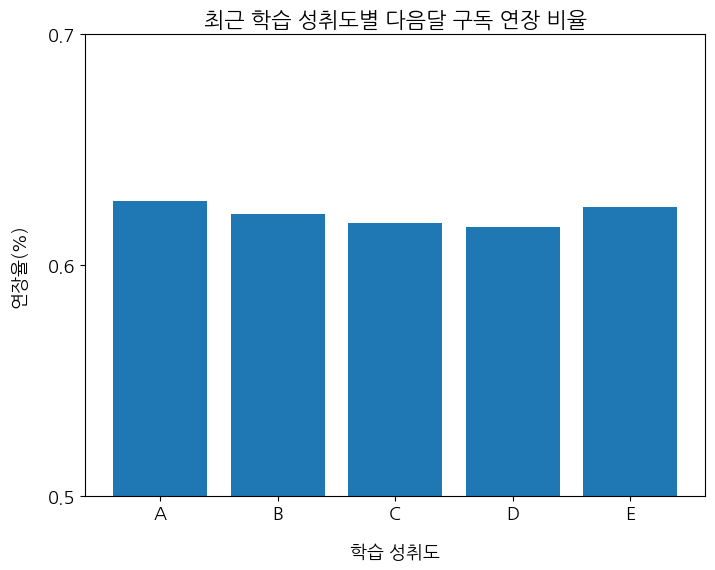

In [69]:
# 시각화

plt.figure(figsize=(8,6))
plt.bar(renewalrate_by_achieve_level.index,renewalrate_by_achieve_level.values)
plt.title('최근 학습 성취도별 다음달 구독 연장 비율')
plt.xlabel('학습 성취도',labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)
plt.ylim(0.5,0.7)
plt.yticks([0.5, 0.6, 0.7])
plt.rc('font', size = 13)

plt.show()


학습 성취도가 높을수록 구독 비율 높음  
but 학습 성취도가 가장 낮은 그룹 역시 구독 비율이 높음

### 가설 6) 중단된 학습 세션수가 적은 사용자일수록 구독 연장을 더 많이 할 것이다.

* 중단된 학습 세션 수 = 콘텐츠에 대한 반응 
    * 학습을 중단하지 않고 이어간는 것은 콘텐츠가 사용자의 학습에 지속적으로 도움이 된다는 뜻!
* 필요한 데이터: 중단된 학습 세션 수별 구독 연장자 수

In [70]:
# 필요한 데이터 로드
df8 = access_data[ ['user_id', 'abandoned_learning_sessions', 'target'] ]
df8

,user_id,abandoned_learning_sessions,target
0,b919c29d,3,0
1,a0a60abb,2,1
2,b9f171ae,3,1
3,5dc0ba8b,0,1
4,65c83654,2,1
...,...,...,...
9995,ae6b76bc,2,1
9996,24588752,3,1
9997,e4622a54,3,1
9998,e07fbad9,4,1


In [71]:
# 중단된 학습 세션 수 고유값 확인: 0~12번
set(access_data['abandoned_learning_sessions'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [72]:
# 중단된 학습 세션 수별 사용자 수
users_by_abandoned_learning = access_data.groupby('abandoned_learning_sessions')['user_id'].count()
users_by_abandoned_learning

abandoned_learning_sessions
0      464
1     1485
2     2226
3     2195
4     1704
5     1026
6      530
7      237
8       91
9       27
10       9
11       4
12       2
Name: user_id, dtype: int64

In [73]:
# 중단된 학습 세션 수별 구독 연장자 수
targets_by_abandoned_learning = access_data.groupby('abandoned_learning_sessions')['target'].sum()
targets_by_abandoned_learning

abandoned_learning_sessions
0      292
1      958
2     1383
3     1348
4     1049
5      624
6      322
7      138
8       61
9       15
10       6
11       1
12       2
Name: target, dtype: int64

In [74]:
# 중단된 학습 세션 수별 구독 연장 비율
renewalrate_by_abandoned_learning = targets_by_abandoned_learning / users_by_abandoned_learning
renewalrate_by_abandoned_learning

abandoned_learning_sessions
0     0.629310
1     0.645118
2     0.621294
3     0.614123
4     0.615610
5     0.608187
6     0.607547
7     0.582278
8     0.670330
9     0.555556
10    0.666667
11    0.250000
12    1.000000
dtype: float64

(0.0, 1.1)

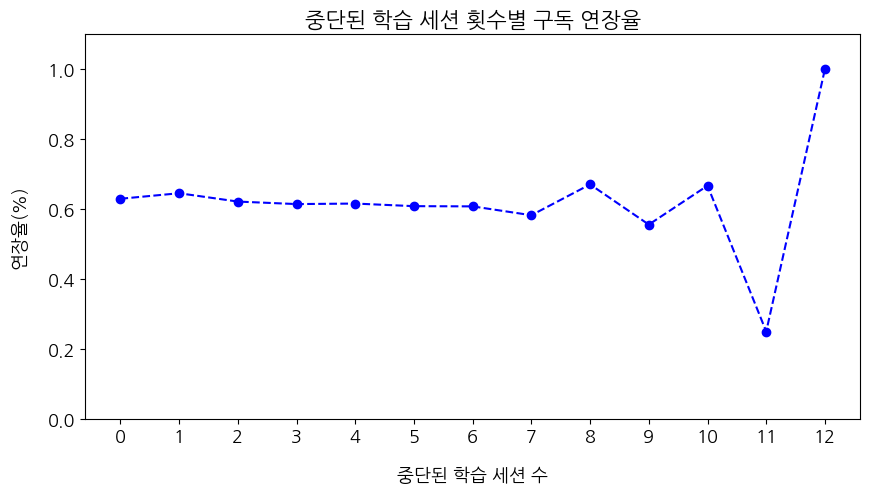

In [76]:
# 시각화

plt.figure(figsize=(10,5))
plt.plot(renewalrate_by_abandoned_learning.index, renewalrate_by_abandoned_learning.values, 'bo--')

plt.title('중단된 학습 세션 횟수별 구독 연장율')
plt.xlabel('중단된 학습 세션 수', labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)

plt.xticks(np.arange(0, 13, 1))
plt.rc('font', size = 13)

plt.ylim(0,1.1)

중단된 세션이 12번인 사용자군의 구독 연장율이 가장 높음
* 하지만 모집단이 2.. > 상관관계가 높다고 볼 수 있을까?


### 가설 7) 선호하는 학습의 난이도가 높을수록 구독을 연장할 가능성이 높을 것이다..
* 선호하는 학습의 난이도 = 콘텐츠에 대한 반응 
    * high일수록 코어 사용자?!
* 필요한 데이터: 선호하는 학습 난이도별 구독 연장자 수

In [77]:
# 필요한 데이터 로드
df9 = access_data[ ['user_id', 'preferred_difficulty_level', 'target'] ]
df9

,user_id,preferred_difficulty_level,target
0,b919c29d,Low,0
1,a0a60abb,Medium,1
2,b9f171ae,Medium,1
3,5dc0ba8b,Low,1
4,65c83654,Medium,1
...,...,...,...
9995,ae6b76bc,Low,1
9996,24588752,Medium,1
9997,e4622a54,High,1
9998,e07fbad9,Low,1


In [78]:
# 선호하는 학습 난이도별 사용자 수
users_by_preferred_level = access_data.groupby('preferred_difficulty_level')['user_id'].count()
users_by_preferred_level

preferred_difficulty_level
High      2000
Low       4992
Medium    3008
Name: user_id, dtype: int64

In [79]:
# 선호하는 학습 난이도별 구독연장자 수
targets_by_preferred_level = access_data.groupby('preferred_difficulty_level')['target'].sum()
targets_by_preferred_level

preferred_difficulty_level
High      1241
Low       3047
Medium    1911
Name: target, dtype: int64

In [80]:
# 선호하는 학습 난이도별 구독 연장 비율
renewalrate_by_preferred_level = targets_by_preferred_level / users_by_preferred_level
renewalrate_by_preferred_level

preferred_difficulty_level
High      0.620500
Low       0.610377
Medium    0.635306
dtype: float64

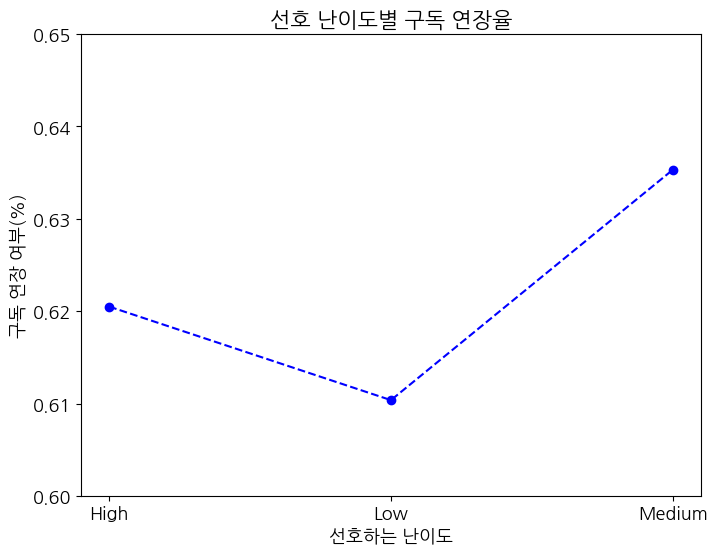

In [81]:
# 시각화

plt.figure(figsize=(8,6))
plt.plot(renewalrate_by_preferred_level.index, renewalrate_by_preferred_level.values, 'bo--')
plt.title('선호 난이도별 구독 연장율')
plt.xlabel('선호하는 난이도')
plt.ylabel('구독 연장 여부(%)')
plt.rc('font', size = 13)

plt.ylim(0.6,0.65)


plt.show()

기각 .. 미디엄이 가장 높네

### 가설 8) 각 학습 세션에 소요된 평균 시간(분)이 길수록 구독을 연장할 가능성이 높을 것이다..
* 각 학습 세션에 소요된 평균 시간은 어떤 사용자가 길까?
    * 어려운 난이도를 선택한 사용자일수록 평균 소요시간이 길 것 (1차 확인)
    * 만약 그렇다면 구독 연장 결정에 무의미한 영향..
    * 그렇지 않다면 또 다른측면으로 생각해보자
* 필요한 데이터: 선호하는 난이도별 각 학습 세션에 소요된 평균 시간

In [82]:
df10 = access_data[ ['user_id', 'preferred_difficulty_level','average_time_per_learning_session', 'target'] ]
df10

,user_id,preferred_difficulty_level,average_time_per_learning_session,target
0,b919c29d,Low,8.427187,0
1,a0a60abb,Medium,72.646087,1
2,b9f171ae,Medium,21.774492,1
3,5dc0ba8b,Low,42.659066,1
4,65c83654,Medium,30.744287,1
...,...,...,...,...
9995,ae6b76bc,Low,84.053558,1
9996,24588752,Medium,45.464833,1
9997,e4622a54,High,127.302411,1
9998,e07fbad9,Low,5.297234,1


In [83]:
# 선호 난이도별 학습 세션에 소요된 평균 시간의 평균
average_time_by_levels = access_data.groupby('preferred_difficulty_level')['average_time_per_learning_session'].mean()
average_time_by_levels
# 높은 난이도를 선호할 수록 학습 세션에 쇼요된 평균 시간이 짧은 경향
# 가설 변경: 학습 세션에 소요된 평균 시간이 높을수록 구독 연장자가 적을 것이다.
# 필요한 데이터: 학습 세션에 소요된 평균 시간별 구독 연장 비율

preferred_difficulty_level
High      48.361022
Low       59.896421
Medium    51.014704
Name: average_time_per_learning_session, dtype: float64

In [84]:
# 학습 세션에 소요된 평균 시간 고유값 확인
set(access_data['average_time_per_learning_session'])

{0.8324105132027313,
 1.7931214906258504,
 2.7309015137269625,
 3.4037410354409587,
 4.850877566592217,
 5.777804611897423,
 6.353139255650717,
 5.072299403038315,
 8.170064988883496,
 9.057327611834012,
 8.783181085049492,
 8.52247726401096,
 12.547499899844652,
 9.525045048568714,
 14.584407433302232,
 14.93849770468671,
 16.62347290583284,
 17.038367920783443,
 12.89841288383866,
 19.750502290258964,
 11.836893264298638,
 13.54951172906216,
 14.9835572270173,
 23.56324726701466,
 24.74490868453276,
 25.319576001561828,
 26.79783516445616,
 27.184120838301396,
 19.053211789493744,
 29.551846142434897,
 21.74761712967235,
 22.98971565852868,
 32.57920514704881,
 33.24039478264251,
 34.03418875983523,
 26.911677383409724,
 36.72276295705744,
 37.38421029670329,
 37.975449223349656,
 39.85539036540597,
 38.55677680268559,
 41.65000333340156,
 42.659066245301446,
 40.01199961946611,
 44.4208848621694,
 44.554998992446144,
 46.05441163154579,
 45.69290791370008,
 46.13820462499814,
 49.82

In [85]:
type(access_data['average_time_per_learning_session'])

pandas.core.series.Series

In [86]:
access_data['average_time_per_learning_session'].max()

503.3726161819107

In [87]:
access_data['average_time_per_learning_session'].min()

0.0115147968748004

In [88]:
labels = ['매우적음', '적음', '보통', '많음']
df10['average_time_per_learning'] = pd.qcut(df10['average_time_per_learning_session'], 4, labels = labels)
df10

C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\12546012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['average_time_per_learning'] = pd.qcut(df10['average_time_per_learning_session'], 4, labels = labels)


,user_id,preferred_difficulty_level,average_time_per_learning_session,target,average_time_per_learning
0,b919c29d,Low,8.427187,0,매우적음
1,a0a60abb,Medium,72.646087,1,보통
2,b9f171ae,Medium,21.774492,1,적음
3,5dc0ba8b,Low,42.659066,1,보통
4,65c83654,Medium,30.744287,1,적음
...,...,...,...,...,...
9995,ae6b76bc,Low,84.053558,1,많음
9996,24588752,Medium,45.464833,1,보통
9997,e4622a54,High,127.302411,1,많음
9998,e07fbad9,Low,5.297234,1,매우적음


In [90]:
# 분 단위를 시간 단위로 변환

import datetime

def minutes_to_time(minutes):
    return datetime.timedelta(minutes=minutes)

In [91]:
data = access_data['average_time_per_learning_session']
minutes_to_time = []

for minutes in data:
    minutes_to_time.append(pd.Timedelta(minutes=minutes))

minutes_to_time

[Timedelta('0 days 00:08:25.631246788'),
 Timedelta('0 days 01:12:38.765195160'),
 Timedelta('0 days 00:21:46.469544083'),
 Timedelta('0 days 00:42:39.543974718'),
 Timedelta('0 days 00:30:44.657220713'),
 Timedelta('0 days 00:34:02.051325590'),
 Timedelta('0 days 01:56:27.356952354'),
 Timedelta('0 days 01:07:49.283575771'),
 Timedelta('0 days 00:37:23.052617802'),
 Timedelta('0 days 00:18:41.776354545'),
 Timedelta('0 days 02:15:15.410047299'),
 Timedelta('0 days 01:57:08.075933898'),
 Timedelta('0 days 02:56:18.286767885'),
 Timedelta('0 days 01:15:17.136197575'),
 Timedelta('0 days 00:02:42.727462204'),
 Timedelta('0 days 01:19:07.301092638'),
 Timedelta('0 days 00:18:45.235984895'),
 Timedelta('0 days 00:36:43.365777423'),
 Timedelta('0 days 00:08:23.399967882'),
 Timedelta('0 days 00:05:50.313442516'),
 Timedelta('0 days 02:41:07.490394035'),
 Timedelta('0 days 02:08:35.933592273'),
 Timedelta('0 days 01:54:01.384822611'),
 Timedelta('0 days 01:17:37.383721700'),
 Timedelta('0 da

In [92]:
f_time = [str(td)[7:] for td in minutes_to_time]
f_time

['00:08:25.631246788',
 '01:12:38.765195160',
 '00:21:46.469544083',
 '00:42:39.543974718',
 '00:30:44.657220713',
 '00:34:02.051325590',
 '01:56:27.356952354',
 '01:07:49.283575771',
 '00:37:23.052617802',
 '00:18:41.776354545',
 '02:15:15.410047299',
 '01:57:08.075933898',
 '02:56:18.286767885',
 '01:15:17.136197575',
 '00:02:42.727462204',
 '01:19:07.301092638',
 '00:18:45.235984895',
 '00:36:43.365777423',
 '00:08:23.399967882',
 '00:05:50.313442516',
 '02:41:07.490394035',
 '02:08:35.933592273',
 '01:54:01.384822611',
 '01:17:37.383721700',
 '00:21:19.104634876',
 '00:14:55.863217764',
 '00:06:10.876569859',
 '04:40:33.142046361',
 '00:17:02.302075247',
 '00:03:46.878907167',
 '00:24:44.694521071',
 '00:25:19.174560093',
 '00:02:49.469229271',
 '00:16:37.408374349',
 '02:53:09.208285090',
 '00:41:43.097073591',
 '01:46:42.797300689',
 '00:50:08.694668006',
 '00:31:03.567263307',
 '00:03:52.966256511',
 '00:01:10.940552803',
 '00:53:23.050865206',
 '00:55:36.639245578',
 '03:30:37.

In [93]:
df10['학습에 소요된 평균 시간'] = f_time
df10

C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\1381032444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['학습에 소요된 평균 시간'] = f_time


,user_id,preferred_difficulty_level,average_time_per_learning_session,target,average_time_per_learning,학습에 소요된 평균 시간
0,b919c29d,Low,8.427187,0,매우적음,00:08:25.631246788
1,a0a60abb,Medium,72.646087,1,보통,01:12:38.765195160
2,b9f171ae,Medium,21.774492,1,적음,00:21:46.469544083
3,5dc0ba8b,Low,42.659066,1,보통,00:42:39.543974718
4,65c83654,Medium,30.744287,1,적음,00:30:44.657220713
...,...,...,...,...,...,...
9995,ae6b76bc,Low,84.053558,1,많음,01:24:03.213496875
9996,24588752,Medium,45.464833,1,보통,00:45:27.889990561
9997,e4622a54,High,127.302411,1,많음,02:07:18.144657131
9998,e07fbad9,Low,5.297234,1,매우적음,00:05:17.834019224


In [94]:
df10['학습에 소요된 평균 시간'] = pd.to_timedelta(df10['학습에 소요된 평균 시간'])
df10['learningtime'] = df10['학습에 소요된 평균 시간'].apply(lambda x: '2시간 이하' if x <= pd.Timedelta('2 hours') else ('4시간 이하' if x <= pd.Timedelta('4 hours') else ('6시간 이하' if x <= pd.Timedelta('6 hours') else ('8시간 초과' if x > pd.Timedelta('8 hours') else '8시간 이하'))))
df10

C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\483663580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['학습에 소요된 평균 시간'] = pd.to_timedelta(df10['학습에 소요된 평균 시간'])
C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\483663580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['learningtime'] = df10['학습에 소요된 평균 시간'].apply(lambda x: '2시간 이하' if x <= pd.Timedelta('2 hours') else ('4시간 이하' if x <= pd.Timedelta('4 hours') else ('6시간 이하' if x <= pd.Timedelta('6 hours') else ('8시간 초과' if x > pd.Time

,user_id,preferred_difficulty_level,average_time_per_learning_session,target,average_time_per_learning,학습에 소요된 평균 시간,learningtime
0,b919c29d,Low,8.427187,0,매우적음,0 days 00:08:25.631246788,2시간 이하
1,a0a60abb,Medium,72.646087,1,보통,0 days 01:12:38.765195160,2시간 이하
2,b9f171ae,Medium,21.774492,1,적음,0 days 00:21:46.469544083,2시간 이하
3,5dc0ba8b,Low,42.659066,1,보통,0 days 00:42:39.543974718,2시간 이하
4,65c83654,Medium,30.744287,1,적음,0 days 00:30:44.657220713,2시간 이하
...,...,...,...,...,...,...,...
9995,ae6b76bc,Low,84.053558,1,많음,0 days 01:24:03.213496875,2시간 이하
9996,24588752,Medium,45.464833,1,보통,0 days 00:45:27.889990561,2시간 이하
9997,e4622a54,High,127.302411,1,많음,0 days 02:07:18.144657131,4시간 이하
9998,e07fbad9,Low,5.297234,1,매우적음,0 days 00:05:17.834019224,2시간 이하


In [95]:
# 학습 세션에 소요된 평균 시간별 사용자 수
users_by_learningtime = df10.groupby('learningtime')['user_id'].count()
users_by_learningtime

learningtime
2시간 이하    8872
4시간 이하     997
6시간 이하     107
8시간 이하      22
8시간 초과       2
Name: user_id, dtype: int64

In [96]:
# 학습 세션에 소요된 평균 시간별 구독 연장자수 
targets_by_learningtime = df10.groupby('learningtime')['target'].sum()
targets_by_learningtime

learningtime
2시간 이하    5326
4시간 이하     742
6시간 이하     107
8시간 이하      22
8시간 초과       2
Name: target, dtype: int64

In [97]:
# 구독 유형별 구독 연장 비율
renewalrate_by_learningtime = targets_by_learningtime / users_by_learningtime
renewalrate_by_learningtime

learningtime
2시간 이하    0.600316
4시간 이하    0.744233
6시간 이하    1.000000
8시간 이하    1.000000
8시간 초과    1.000000
dtype: float64

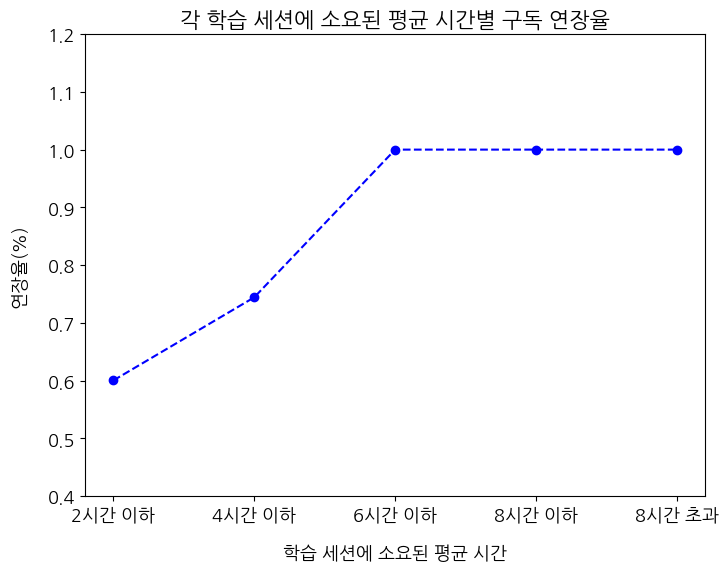

In [98]:
# 시각화

plt.figure(figsize=(8,6))
plt.plot(renewalrate_by_learningtime.index, renewalrate_by_learningtime.values, 'bo--')
plt.title('각 학습 세션에 소요된 평균 시간별 구독 연장율')
plt.xlabel('학습 세션에 소요된 평균 시간', labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)
plt.rc('font', size = 13)

plt.ylim(0.4,1.2)


plt.show()

각 학습 세션에 소요된 평균 시간이 4시간 초과 6시간 이하인 구간에서 다음달 구독 연장율이 급격히 증가 > 해당 구간의 학습 시간을 기록한 사용자들을 집중 타겟으로 연장 유도해보기  

6시간을 초과한 모든 사용자가 다음달 구독 연장을 결정함 (평균 소요 시간이 길수록 구독 가능성이 높을 것이라는 가설 확인 완료)  
but 해당 사용자군의 모집단이 적음을 감안하기

### 가설 9) 커뮤니티 참여도가 높을수록 구독을 연장할 가능성이 높을 것이다.
* 커뮤니티 참여도가 높다 = 서비스에 관심이 높다
* 필요한 데이터: 커뮤니티 참여도별 구독 연장율

In [99]:
#  필요한 데이터 프레임 생성
df11 = access_data[ ['user_id', 'community_engagement_level', 'target']]
df11

,user_id,community_engagement_level,target
0,b919c29d,4,0
1,a0a60abb,3,1
2,b9f171ae,4,1
3,5dc0ba8b,3,1
4,65c83654,4,1
...,...,...,...
9995,ae6b76bc,5,1
9996,24588752,3,1
9997,e4622a54,5,1
9998,e07fbad9,5,1


In [100]:
# 커뮤니티 참여도 고유값 확인
set(df11['community_engagement_level'])

{1, 2, 3, 4, 5}

In [101]:
# 범주화할 데이터 리스트 만들기
community_engage_level = list(df11['community_engagement_level'])
community_engage_level[:10]

[4, 3, 4, 3, 4, 4, 2, 5, 4, 4]

In [102]:
# 범주를 구분하는 기준 및 라벨 만들기
bins = [0, 1, 2, 3, 4, 5]
labels=['매우낮음', '낮음', '보통', '높음', '매우높음']

# 참여도에따라 범주화하기
engage_level = pd.cut(community_engage_level, bins, right = True, include_lowest=True, labels=labels)
engage_level

['높음', '보통', '높음', '보통', '높음', ..., '매우높음', '보통', '매우높음', '매우높음', '매우높음']
Length: 10000
Categories (5, object): ['매우낮음' < '낮음' < '보통' < '높음' < '매우높음']

In [103]:
# 범주화 결과물을 테이블로 변경
engage_level = pd.DataFrame(engage_level)
engage_level.tail()

,0
9995,매우높음
9996,보통
9997,매우높음
9998,매우높음
9999,매우높음


In [104]:
# 기존 테이블에 합치기
df11 = pd.concat( [df11, engage_level], axis = 1, join='inner')
df11

,user_id,community_engagement_level,target,0
0,b919c29d,4,0,높음
1,a0a60abb,3,1,보통
2,b9f171ae,4,1,높음
3,5dc0ba8b,3,1,보통
4,65c83654,4,1,높음
...,...,...,...,...
9995,ae6b76bc,5,1,매우높음
9996,24588752,3,1,보통
9997,e4622a54,5,1,매우높음
9998,e07fbad9,5,1,매우높음


In [105]:
# 컬럼명 변경
df11.columns = ['community_engagement_level', 'user_id', 'target', 'engagement_level']
df11

,community_engagement_level,user_id,target,engagement_level
0,b919c29d,4,0,높음
1,a0a60abb,3,1,보통
2,b9f171ae,4,1,높음
3,5dc0ba8b,3,1,보통
4,65c83654,4,1,높음
...,...,...,...,...
9995,ae6b76bc,5,1,매우높음
9996,24588752,3,1,보통
9997,e4622a54,5,1,매우높음
9998,e07fbad9,5,1,매우높음


In [106]:
# 커뮤니티 참여도별 사용자 수
users_by_engagement_level = df11.groupby('engagement_level')['user_id'].count()
users_by_engagement_level

engagement_level
매우낮음     559
낮음      1219
보통      1588
높음      2070
매우높음    4564
Name: user_id, dtype: int64

In [107]:
# 커뮤니티 참여도별 구독 연장자 수
targets_by_engagement_level = df11.groupby('engagement_level')['target'].sum()
targets_by_engagement_level

engagement_level
매우낮음     348
낮음       751
보통       968
높음      1265
매우높음    2867
Name: target, dtype: int64

In [108]:
# 커뮤니티 참여도별 구독 연장 비율
renewalrate_by_engagement_level = targets_by_engagement_level/ users_by_engagement_level
renewalrate_by_engagement_level

engagement_level
매우낮음    0.622540
낮음      0.616079
보통      0.609572
높음      0.611111
매우높음    0.628177
dtype: float64

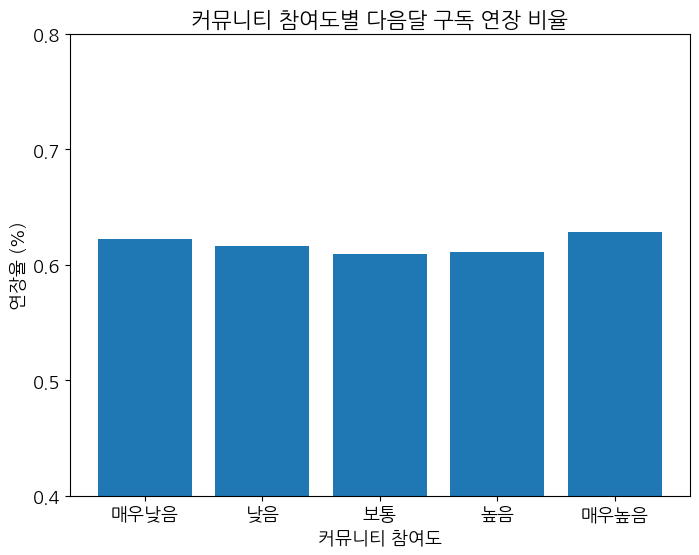

In [109]:
# 시각화
plt.figure(figsize=(8,6))
plt.bar(renewalrate_by_engagement_level.index, renewalrate_by_engagement_level.values)
plt.title('커뮤니티 참여도별 다음달 구독 연장 비율')
plt.xlabel('커뮤니티 참여도')
plt.ylabel('연장율 (%)')
plt.ylim(0.4,0.8)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8])

plt.show()

커뮤니티 참여도가 높을수록 구독 연장율이 높아지는 것은 아님  
하지만 커뮤니티 참여도 5점일 때의 구독 연장율이 가장 높게 나타나는 것은 맞음

### 가설 10) 고객 문의 이력이 적을수록 구독을 연장할 가능성이 높을 것이다.
* 고객 문의가 서비스에 대한 불만 및 문제 해결을 위해 남기는 것이라면
    * 고객 문의가 낮다 = 서비스에 대한 불만 및 문제가 적다 = 서비스 만족도
* 필요한 데이터: 고객 문의 이력별 구독 연장율

In [111]:
# 필요한 데이터 프레임 생성

df12 = access_data[ ['user_id', 'customer_inquiry_history', 'target'] ]
df12

,user_id,customer_inquiry_history,target
0,b919c29d,4,0
1,a0a60abb,1,1
2,b9f171ae,0,1
3,5dc0ba8b,1,1
4,65c83654,3,1
...,...,...,...
9995,ae6b76bc,1,1
9996,24588752,2,1
9997,e4622a54,1,1
9998,e07fbad9,2,1


In [112]:
# 고객 문의 이력 고유값 확인 : 0~10 (9x) > 횟수!
set(df12['customer_inquiry_history'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 10}

In [113]:
# 고객 문의 이력별 사용자 수
users_by_inquirytimes = df12.groupby('customer_inquiry_history')['user_id'].count()
users_by_inquirytimes

customer_inquiry_history
0     1376
1     2668
2     2645
3     1851
4      917
5      385
6      117
7       31
8        9
10       1
Name: user_id, dtype: int64

In [115]:
# 고객 문의 이력별 구독 연장자 수
targets_by_inquirytimes = access_data.groupby('customer_inquiry_history')['target'].sum()
targets_by_inquirytimes

customer_inquiry_history
0      876
1     1617
2     1655
3     1150
4      553
5      245
6       76
7       21
8        6
10       0
Name: target, dtype: int64

In [116]:
# 고객 문의 이력별 구독 연장 비율
renewalrate_by_inquirytimes = targets_by_inquirytimes / users_by_inquirytimes
renewalrate_by_inquirytimes

customer_inquiry_history
0     0.636628
1     0.606072
2     0.625709
3     0.621286
4     0.603053
5     0.636364
6     0.649573
7     0.677419
8     0.666667
10    0.000000
dtype: float64

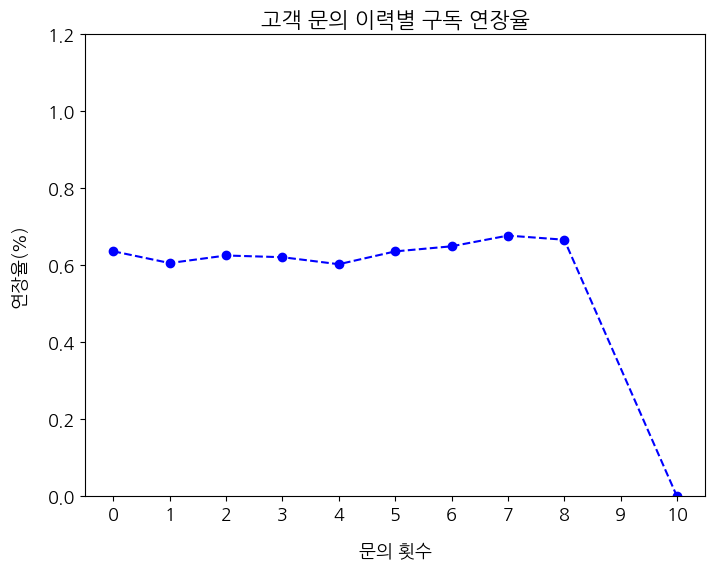

In [139]:
# 시각화

plt.figure(figsize=(8,6))
plt.plot(renewalrate_by_inquirytimes.index, renewalrate_by_inquirytimes.values, 'bo--')
plt.title('고객 문의 이력별 구독 연장율')
plt.xlabel('문의 횟수', labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)
plt.rc('font', size = 13)

plt.xticks(np.arange(0,11,1))
plt.ylim(0,1.2)


plt.show()

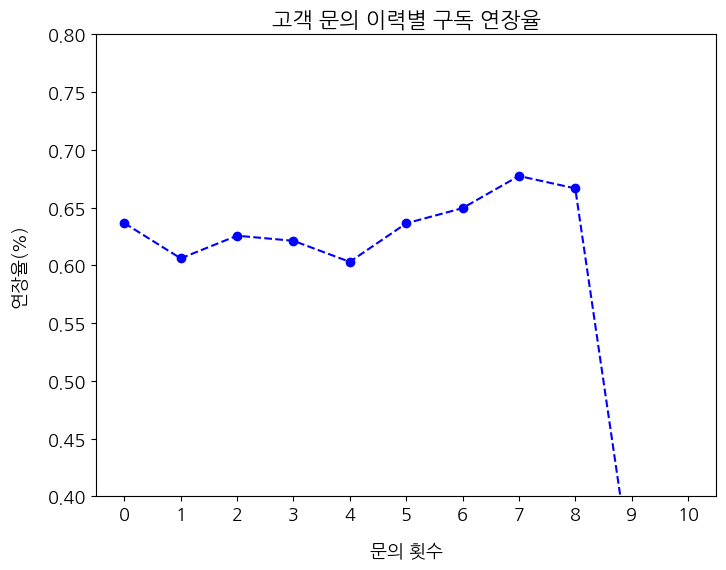

In [142]:
# 시각화2

plt.figure(figsize=(8,6))
plt.plot(renewalrate_by_inquirytimes.index, renewalrate_by_inquirytimes.values, 'bo--')
plt.title('고객 문의 이력별 구독 연장율')
plt.xlabel('문의 횟수', labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)
plt.rc('font', size = 13)

plt.xticks(np.arange(0,11,1))
plt.ylim(0.4,0.8)


plt.show()

문의 횟수가 많을수록 구독율 증가
* 고객 문의는 서비스에 대한 불만 및 문제 해결을 위해 남기는 것이라기보다, 학습에 대한 질의응답에 가까울 것
    * 질의응답 횟수가 많다 = 상호작용 활발 = 만족도

### 가설 11) 평균 로그인 시간이 길수록 구독을 연장할 가능성이 높을 것이다.
* 평균 로그인 시간 = 평균적으로 접속한 시간대
    * 처음 가설 기각
    * 접속 시간대별로 구독 연장 비율을 확인할 수 있음
* 필요한 데이터: 평균 로그인 시간별 구독 연장율

In [145]:
# 필요한 데이터프레임 생성
df13 = access_data[ ['user_id', 'average_login_time', 'target'] ]
df13

,user_id,average_login_time,target
0,b919c29d,14.946163,0
1,a0a60abb,18.453224,1
2,b9f171ae,16.195228,1
3,5dc0ba8b,17.628656,1
4,65c83654,21.390656,1
...,...,...,...
9995,ae6b76bc,14.727623,1
9996,24588752,19.374054,1
9997,e4622a54,18.240978,1
9998,e07fbad9,18.783800,1


In [147]:
df13['average_login_time'].dtypes

dtype('float64')

In [149]:
set(df13['average_login_time'])

{3.3751700444084207,
 5.759785356512211,
 6.120628598463696,
 7.869455509385858,
 8.941205666655733,
 9.48534333094267,
 10.6005673198448,
 11.347411177646478,
 9.586166884237628,
 9.559107701680205,
 14.06963181550016,
 14.946162670655838,
 14.335260912609414,
 17.628655750735078,
 18.18745131629005,
 18.05473513684393,
 16.3015012777026,
 21.39065587777074,
 16.281272660489165,
 23.26749927532748,
 24.308933869748543,
 16.87965187375778,
 26.99849039475086,
 18.797239787142644,
 19.392879544311995,
 20.35100475412287,
 21.10540740376325,
 22.12776070236545,
 24.44545137667231,
 24.065105803297897,
 25.10060843678444,
 15.588591125235968,
 15.42083375482806,
 9.566645318585415,
 10.383009092692191,
 10.44754976654076,
 11.331500322363354,
 11.892581172777682,
 11.02504011410474,
 11.854058656602774,
 11.694596057496256,
 12.381563459314748,
 12.93180758955532,
 11.190019099572964,
 12.967688862500836,
 11.154340623049748,
 13.302172669868469,
 13.866259996532335,
 13.513376314898778,


In [150]:
df13['average_login_time'].max()

26.99849039475086

In [151]:
df13['average_login_time'].min()

2.366189403801356

해당 데이터는 시간 단위로 측정된 값일 것
* 각 학습 세션에 소요된 평균 시간(분) = 503.3726161819107 -> 이렇게 출력됐음

In [154]:
# float64 타입 값을 시간 단위로 변환
df13['average_login_time'] = pd.to_timedelta(df13['average_login_time'], unit='h')
df13

C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\3091498441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['average_login_time'] = pd.to_timedelta(df13['average_login_time'], unit='h')


,user_id,average_login_time,target
0,b919c29d,0 days 14:56:46.185614361,0
1,a0a60abb,0 days 18:27:11.605443746,1
2,b9f171ae,0 days 16:11:42.820696464,1
3,5dc0ba8b,0 days 17:37:43.160702646,1
4,65c83654,0 days 21:23:26.361159975,1
...,...,...,...
9995,ae6b76bc,0 days 14:43:39.444596832,1
9996,24588752,0 days 19:22:26.595827544,1
9997,e4622a54,0 days 18:14:27.520275498,1
9998,e07fbad9,0 days 18:47:01.680014558,1


평균 접속 시간이구나!!

In [184]:
# 필요한 데이터만 슬라이싱해서 데이터프레임 재생성

to_time = df13['average_login_time']

f_time2 = [str(td)[7:] for td in to_time]
f_time2

df13['평균 접속 시간'] = f_time2
df13

C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\787614561.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['평균 접속 시간'] = f_time2


,user_id,average_login_time,target,avg_access_time,평균 접속 시간
0,b919c29d,0 days 14:56:46.185614361,0,밤,14:56:46.185614361
1,a0a60abb,0 days 18:27:11.605443746,1,밤,18:27:11.605443746
2,b9f171ae,0 days 16:11:42.820696464,1,밤,16:11:42.820696464
3,5dc0ba8b,0 days 17:37:43.160702646,1,밤,17:37:43.160702646
4,65c83654,0 days 21:23:26.361159975,1,밤,21:23:26.361159975
...,...,...,...,...,...
9995,ae6b76bc,0 days 14:43:39.444596832,1,밤,14:43:39.444596832
9996,24588752,0 days 19:22:26.595827544,1,밤,19:22:26.595827544
9997,e4622a54,0 days 18:14:27.520275498,1,밤,18:14:27.520275498
9998,e07fbad9,0 days 18:47:01.680014558,1,밤,18:47:01.680014558


In [158]:
df13['평균 접속 시간'].max()

'23:52:51.178283662'

In [159]:
df13['평균 접속 시간'].min()

'00:02:30.464185754'

법과 절기학으로는 
* 0-5시는 새벽, 5-9시는 아침, 9-17시는 낮, 17-21시는 저녁, 21-24시는 밤을 의미

In [185]:
# 평균 접속 시간열을 시간 형식으로 변환
df13['평균 접속 시간'] = pd.to_datetime(df13['평균 접속 시간'])
df13

C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\2618367265.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df13['평균 접속 시간'] = pd.to_datetime(df13['평균 접속 시간'])
C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\2618367265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['평균 접속 시간'] = pd.to_datetime(df13['평균 접속 시간'])


,user_id,average_login_time,target,avg_access_time,평균 접속 시간
0,b919c29d,0 days 14:56:46.185614361,0,밤,2024-01-02 14:56:46
1,a0a60abb,0 days 18:27:11.605443746,1,밤,2024-01-02 18:27:11
2,b9f171ae,0 days 16:11:42.820696464,1,밤,2024-01-02 16:11:42
3,5dc0ba8b,0 days 17:37:43.160702646,1,밤,2024-01-02 17:37:43
4,65c83654,0 days 21:23:26.361159975,1,밤,2024-01-02 21:23:26
...,...,...,...,...,...
9995,ae6b76bc,0 days 14:43:39.444596832,1,밤,2024-01-02 14:43:39
9996,24588752,0 days 19:22:26.595827544,1,밤,2024-01-02 19:22:26
9997,e4622a54,0 days 18:14:27.520275498,1,밤,2024-01-02 18:14:27
9998,e07fbad9,0 days 18:47:01.680014558,1,밤,2024-01-02 18:47:01


In [186]:
# 필요한 데이터만 슬라이싱해서 데이터프레임 재생성

to_time2 = df13['평균 접속 시간']

f_time3 = [str(td)[11:] for td in to_time2]
f_time3

df13['평균 접속 시간2'] = f_time3
df13

C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\1726904568.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['평균 접속 시간2'] = f_time3


,user_id,average_login_time,target,avg_access_time,평균 접속 시간,평균 접속 시간2
0,b919c29d,0 days 14:56:46.185614361,0,밤,2024-01-02 14:56:46,14:56:46
1,a0a60abb,0 days 18:27:11.605443746,1,밤,2024-01-02 18:27:11,18:27:11
2,b9f171ae,0 days 16:11:42.820696464,1,밤,2024-01-02 16:11:42,16:11:42
3,5dc0ba8b,0 days 17:37:43.160702646,1,밤,2024-01-02 17:37:43,17:37:43
4,65c83654,0 days 21:23:26.361159975,1,밤,2024-01-02 21:23:26,21:23:26
...,...,...,...,...,...,...
9995,ae6b76bc,0 days 14:43:39.444596832,1,밤,2024-01-02 14:43:39,14:43:39
9996,24588752,0 days 19:22:26.595827544,1,밤,2024-01-02 19:22:26,19:22:26
9997,e4622a54,0 days 18:14:27.520275498,1,밤,2024-01-02 18:14:27,18:14:27
9998,e07fbad9,0 days 18:47:01.680014558,1,밤,2024-01-02 18:47:01,18:47:01


In [197]:
# 기준에 따라 범주화하는 함수 정의
def acesstime(x):
    start_hour = int(str(x)[:2])  # 시간 문자열의 처음 두 자리를 추출하여 정수로 변환
    
    if start_hour in [21, 22, 23, 0, 1, 2]:
        return '밤'
    elif start_hour in [3, 4, 5]:
        return '새벽'
    elif start_hour in [6, 7, 8, 9]:
        return '아침'
    elif start_hour in [10, 11, 12, 13, 14, 15, 16, 17]:
        return '낮'
    elif start_hour in [18, 19, 20]:
        return '저녁'
    else:
        return '밤'

# 새로운 카테고리 열 생성
df13['avg_access_time'] = df13['평균 접속 시간2'].apply(acesstime)
df13

C:\Users\limfl\AppData\Local\Temp\ipykernel_27028\3986043925.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['avg_access_time'] = df13['평균 접속 시간2'].apply(acesstime)


,user_id,average_login_time,target,avg_access_time,평균 접속 시간,평균 접속 시간2
0,b919c29d,0 days 14:56:46.185614361,0,낮,2024-01-02 14:56:46,14:56:46
1,a0a60abb,0 days 18:27:11.605443746,1,저녁,2024-01-02 18:27:11,18:27:11
2,b9f171ae,0 days 16:11:42.820696464,1,낮,2024-01-02 16:11:42,16:11:42
3,5dc0ba8b,0 days 17:37:43.160702646,1,낮,2024-01-02 17:37:43,17:37:43
4,65c83654,0 days 21:23:26.361159975,1,밤,2024-01-02 21:23:26,21:23:26
...,...,...,...,...,...,...
9995,ae6b76bc,0 days 14:43:39.444596832,1,낮,2024-01-02 14:43:39,14:43:39
9996,24588752,0 days 19:22:26.595827544,1,저녁,2024-01-02 19:22:26,19:22:26
9997,e4622a54,0 days 18:14:27.520275498,1,저녁,2024-01-02 18:14:27,18:14:27
9998,e07fbad9,0 days 18:47:01.680014558,1,저녁,2024-01-02 18:47:01,18:47:01


In [200]:
# 평균 접속시간대별 사용자 수
users_by_acesstime = df13.groupby('avg_access_time')['user_id'].count()
users_by_acesstime

avg_access_time
낮     7926
밤      225
새벽      14
아침     465
저녁    1370
Name: user_id, dtype: int64

In [202]:
# 평균 접속시간대별 구독 연장자 수
targets_by_acesstime = df13.groupby('avg_access_time')['target'].sum()
targets_by_acesstime

avg_access_time
낮     4894
밤      148
새벽       9
아침     306
저녁     842
Name: target, dtype: int64

In [218]:
# 평균 접속 시간대별 구독 연장 비율
renewalrate_by_acesstime = targets_by_acesstime / users_by_acesstime
renewalrate_by_acesstime

avg_access_time
낮     0.617462
밤     0.657778
새벽    0.642857
아침    0.658065
저녁    0.614599
dtype: float64

In [220]:
# 데이터 정렬
renewalrate_by_acesstime = renewalrate_by_acesstime.reindex(['저녁', '밤', '새벽', '아침', '낮'])

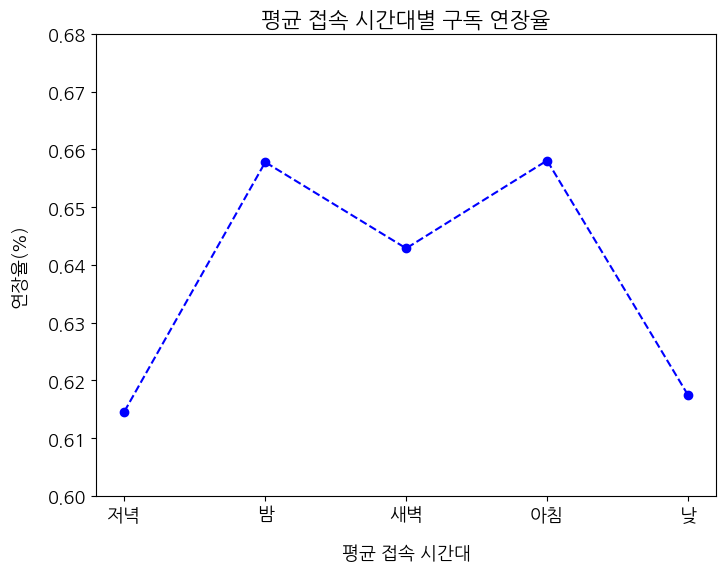

In [222]:
# 시각화

plt.figure(figsize=(8,6))
plt.plot(renewalrate_by_acesstime.index, renewalrate_by_acesstime.values, 'bo--')
plt.title('평균 접속 시간대별 구독 연장율')
plt.xlabel('평균 접속 시간대', labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)
plt.rc('font', size = 13)

plt.ylim(0.6,0.68)


plt.show()

오후 9-오전2시경(밤), 오전 6-9시경(아침)에 접속하는 비율이 가장 높고,  
그 다음으로 오전 3-5시(새벽)에 접속하는 비율이 높음(하지만 모집단이 적음)

### 가설 12) 서비스에 가입한 기간이 길수록 구독을 연장할 가능성이 높을 것이다.
* 서비스 가입 기간과 만족도는 비례할까?
* 필요한 데이터: 서비스 가입 기간(월)별 구독 연장율

In [223]:
# 필요한 데이터 로드

df14 = access_data[ ['user_id', 'subscription_duration', 'target'] ]
df14

,user_id,subscription_duration,target
0,b919c29d,13,0
1,a0a60abb,16,1
2,b9f171ae,22,1
3,5dc0ba8b,1,1
4,65c83654,4,1
...,...,...,...
9995,ae6b76bc,22,1
9996,24588752,10,1
9997,e4622a54,7,1
9998,e07fbad9,11,1


In [224]:
set(df14['subscription_duration'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [225]:
# 가입 기간별 사용자 수
users_by_duration = access_data.groupby('subscription_duration')['user_id'].count()
users_by_duration

subscription_duration
1     436
2     443
3     408
4     475
5     424
6     471
7     432
8     438
9     440
10    448
11    428
12    461
13    437
14    418
15    408
16    448
17    429
18    464
19    423
20    412
21    433
22    414
23    410
Name: user_id, dtype: int64

In [226]:
# 가입기간 별 구독 연장자 수
targets_by_duration = access_data.groupby('subscription_duration')['target'].sum()
targets_by_duration

subscription_duration
1     264
2     284
3     280
4     294
5     255
6     276
7     274
8     255
9     268
10    284
11    262
12    284
13    284
14    265
15    250
16    277
17    277
18    287
19    267
20    252
21    267
22    260
23    233
Name: target, dtype: int64

In [227]:
# 구독 유형별 구독 연장 비율
renewalrate_by_duration = targets_by_duration / users_by_duration
renewalrate_by_duration

subscription_duration
1     0.605505
2     0.641084
3     0.686275
4     0.618947
5     0.601415
6     0.585987
7     0.634259
8     0.582192
9     0.609091
10    0.633929
11    0.612150
12    0.616052
13    0.649886
14    0.633971
15    0.612745
16    0.618304
17    0.645688
18    0.618534
19    0.631206
20    0.611650
21    0.616628
22    0.628019
23    0.568293
dtype: float64

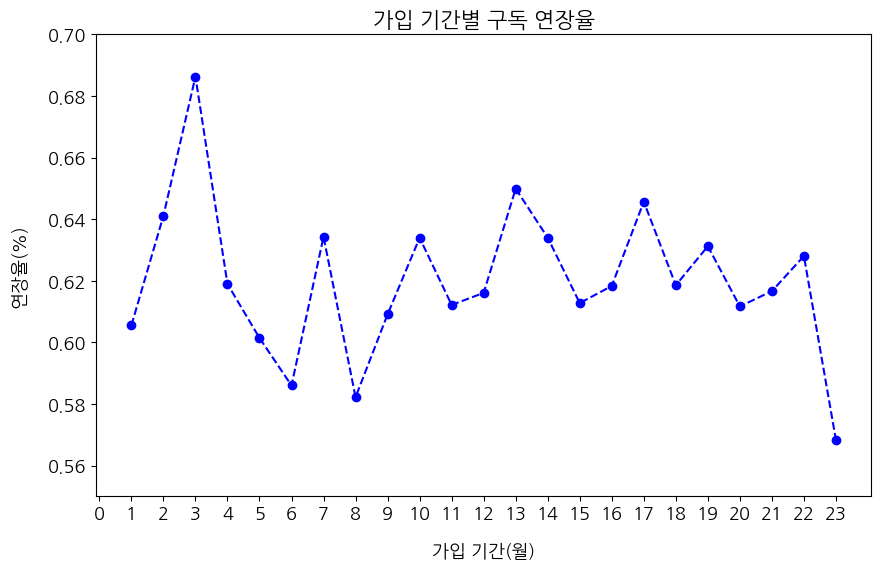

In [233]:
# 시각화

plt.figure(figsize=(10,6))
plt.plot(renewalrate_by_duration.index, renewalrate_by_duration.values, 'bo--')
plt.title('가입 기간별 구독 연장율')
plt.xlabel('가입 기간(월)', labelpad=15)
plt.ylabel('연장율(%)', labelpad=15)
plt.rc('font', size = 13)

plt.ylim(0.55,0.7)
plt.xticks(np.arange(0, 24, 1))


plt.show()

In [235]:
# 가입한지 1개월된 사용자 데이터 확인
test_df = access_data[access_data['subscription_duration'] == 1]
test_df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
30,8211b1ee,1,19,7.399941,24.744909,17,9,79.611846,3,5,High,Basic,3,1,1
39,33319bcd,1,14,10.247550,3.882771,14,11,72.988718,3,2,Low,Basic,3,5,1
42,561313bc,1,9,15.682524,55.610654,14,13,54.538966,1,2,Low,Basic,1,1,1
49,c3ad6bfd,1,14,20.719766,65.277016,19,12,90.600159,2,5,Low,Basic,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,42b9d214,1,5,16.858077,156.808773,15,12,70.413529,3,4,Low,Basic,1,1,0
9864,71200c7a,1,27,13.551221,10.477638,19,12,80.723846,3,2,Low,Basic,2,5,0
9884,742f9837,1,23,17.509128,38.996879,7,13,71.710803,5,5,Low,Basic,5,4,1
9885,792f7ece,1,24,10.951879,8.615199,5,11,75.804955,3,3,Medium,Premium,1,7,1


In [237]:
if any(test_df['payment_pattern'] == 7):
    print('있다')
else:
    print('없다')

# 가입 기간이 1개월됐는데 어떻게 지난 3개월간 결제를....??
# 비회원 결제도 허용하나보다 (근데 데이터를 어떻게 저장하지 전화번호??)

있다
